In [1]:
import os 
os.chdir("..")

# Explatory Data Analysis (EDA)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


In [3]:
from case_src.logging.logger import LOG_FILE_PATH
from case_src.exception import (
    PipelineException,
    DataLoadingException,
    DataValidationException,
    ConfigurationException,
)
from case_src.utils.analyze_utils.utils import AnalyzeDataFrame
from case_src.utils.visualize_utils.utils import VisualizeDataFrame
from case_src.utils.preprocess_utils.utils import PreprocessDataFrame

analyze_df = AnalyzeDataFrame()
visualize_df = VisualizeDataFrame()
preprocess_df = PreprocessDataFrame()



In [4]:
BASE_DIR = "/Users/user/Desktop/Projects/ds_case_pusula/data/feature_engineering"
FILE_NAME = "feature_engineering_data.csv"

path = os.path.join(BASE_DIR, FILE_NAME)

df = pd.read_csv(path)

df

,HASTANO,YAS,CINSIYET,KANGRUBU,UYRUK,KRONIKHASTALIK,BOLUM,ALERJI,TANILAR,TEDAVIADI,...,IS_RESPIRATORY,IS_ELECTROTHERAPY,IS_MASSAGE,IS_ORTHOPEDIC,IS_OTHER,YAS_LABELS,KANGRUBU_TYPE,KANGRUBU_POSITIVE,REPETITIVE_DATA,HASTANO_COUNT
0,145134,60,kadın,0 rh+,türkiye,"becker musküler distrofisi, hipotiroidizm, kal...","fiziksel tıp ve rehabilitasyon,solunum merkezi",toz,ayak bileği ve ayağın yüzeysel yaralanması,ayak bileği,...,0,0,0,0,1,YASLI,0,1,1,1
1,145135,28,erkek,0 rh+,türkiye,"duchenne musküler distrofisi, myastenia gravis...","fiziksel tıp ve rehabilitasyon,solunum merkezi",yok,"omuzun darbe sendromu,dorsalji̇, di̇ğer, servi...",dorsalji -boyun+trapez+skapular,...,0,0,0,0,0,GENC_YETISKIN,0,1,1,5
2,145135,28,erkek,0 rh+,türkiye,"duchenne musküler distrofisi, myastenia gravis...","fiziksel tıp ve rehabilitasyon,solunum merkezi",yok,"omuzun darbe sendromu,dorsalji̇, di̇ğer, servi...",dorsalji -boyun+trapez+skapular,...,0,0,0,0,0,GENC_YETISKIN,0,1,1,5
3,145135,28,erkek,0 rh+,türkiye,"duchenne musküler distrofisi, myastenia gravis...","fiziksel tıp ve rehabilitasyon,solunum merkezi",yok,"omuzun darbe sendromu,dorsalji̇, di̇ğer, servi...",dorsalji -boyun+trapez+skapular,...,0,0,0,0,0,GENC_YETISKIN,0,1,1,5
4,145135,28,erkek,0 rh+,türkiye,"duchenne musküler distrofisi, myastenia gravis...","fiziksel tıp ve rehabilitasyon,solunum merkezi",yok,"omuzun darbe sendromu,dorsalji̇, di̇ğer, servi...",dorsalji -boyun+trapez+skapular,...,0,0,0,0,0,GENC_YETISKIN,0,1,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2230,145536,48,erkek,0 rh+,türkiye,"aritmi, myastenia gravis, fascioscapulohumeral...","fiziksel tıp ve rehabilitasyon,solunum merkezi","arveles,coraspin",eklemin kontraktürü,ekstansör tendon rehabilitasyon,...,0,0,0,0,0,YASLI,0,1,1,4
2231,145536,48,erkek,0 rh+,türkiye,"aritmi, myastenia gravis, fascioscapulohumeral...","fiziksel tıp ve rehabilitasyon,solunum merkezi","arveles,coraspin",eklemin kontraktürü,ekstansör tendon rehabilitasyon,...,0,0,0,0,0,YASLI,0,1,1,4
2232,145537,33,kadın,a rh+,türkiye,myastenia gravis,"fiziksel tıp ve rehabilitasyon,solunum merkezi",sucuk,"aşil tendon yaralanması,​algonörodistrofi,​ ay...",aşil rüptürü rehabilitasyonu,...,0,0,0,0,0,ORTA_YAS,A,1,1,3
2233,145537,33,kadın,a rh+,türkiye,myastenia gravis,"fiziksel tıp ve rehabilitasyon,solunum merkezi",sucuk,"aşil tendon yaralanması,algonörodistrofi, ayak...",aşil rüptürü rehabilitasyonu,...,0,0,0,0,0,ORTA_YAS,A,1,1,3


In [5]:
ORIGINAL_DATA_BASE_DIR = "/Users/user/Desktop/Projects/ds_case_pusula/data"
FILE_NAME = "Talent_Academy_Case_DT_2025.xlsx"

original_data_path = os.path.join(ORIGINAL_DATA_BASE_DIR, FILE_NAME)

original_data = pd.read_excel(original_data_path)

original_data.head()

,HastaNo,Yas,Cinsiyet,KanGrubu,Uyruk,KronikHastalik,Bolum,Alerji,Tanilar,TedaviAdi,TedaviSuresi,UygulamaYerleri,UygulamaSuresi
0,145134,60,Kadın,0 Rh+,Türkiye,"Becker Musküler Distrofisi, Hiportiroidizm, Ka...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",TOZ,Ayak bileği ve ayağın yüzeysel yaralanması,Ayak Bileği,5 Seans,Ayak Bileği,20 Dakika
1,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,20 Dakika
2,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,"Boyun,Sırt",20 Dakika
3,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,5 Dakika
4,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,"Boyun,Sırt",20 Dakika


In [9]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2235 entries, 0 to 2234
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   HastaNo          2235 non-null   int64 
 1   Yas              2235 non-null   int64 
 2   Cinsiyet         2066 non-null   object
 3   KanGrubu         1560 non-null   object
 4   Uyruk            2235 non-null   object
 5   KronikHastalik   1624 non-null   object
 6   Bolum            2224 non-null   object
 7   Alerji           1291 non-null   object
 8   Tanilar          2160 non-null   object
 9   TedaviAdi        2235 non-null   object
 10  TedaviSuresi     2235 non-null   object
 11  UygulamaYerleri  2014 non-null   object
 12  UygulamaSuresi   2235 non-null   object
dtypes: int64(2), object(11)
memory usage: 227.1+ KB


In [18]:
contains_missing_values_cols = analyze_df.missing_values_table(original_data, na_name=True)

numeric_cols = original_data.select_dtypes(include=['int64', 'float64']).columns.tolist()

original_data['TedaviSuresi_Numeric'] = original_data['TedaviSuresi'].str.extract('(\d+)').astype(float)

analyze_df.missing_vs_target(original_data, 'TedaviSuresi_Numeric', numeric_cols)

                 n_miss  ratio
Alerji              944  42.24
KanGrubu            675  30.20
KronikHastalik      611  27.34
UygulamaYerleri     221   9.89
Cinsiyet            169   7.56
Tanilar              75   3.36
Bolum                11   0.49
                 TARGET_MEAN  Count
HastaNo_NA_FLAG                    
0                  14.570917   2235


             TARGET_MEAN  Count
Yas_NA_FLAG                    
0              14.570917   2235




In [19]:
cat_cols, num_cols, cat_but_car = analyze_df.grab_col_names(df)

Observations: 2235
Variables: 45
cat_cols: 29
num_cols: 9
cat_but_car: 7
num_but_cat: 21

Categorical Cols: ['CINSIYET', 'KANGRUBU', 'UYRUK', 'BOLUM', 'TANI_CATEGORY_LIST', 'TEDAVI_KATEGORISI', 'YAS_LABELS', 'KANGRUBU_TYPE', 'ALERJI_SAYI', 'UYGULAMAYERLERI_SAYI', 'KRONIKHASTALIK_SAYI', 'TEDAVIADI_SAYI', 'MULTI_MORBIDITY_FLAG', 'HAS_DIABETES', 'HAS_HYPERTENSION', 'HAS_CARDIAC', 'HAS_RESPIRATORY', 'HAS_MUSCULAR_DYSTROPHY', 'HAS_THYROID', 'RISK_SKORU', 'TEDAVI_SAYISI_UNIQUE', 'IS_PHYSIOTHERAPY', 'IS_RESPIRATORY', 'IS_ELECTROTHERAPY', 'IS_MASSAGE', 'IS_ORTHOPEDIC', 'IS_OTHER', 'KANGRUBU_POSITIVE', 'REPETITIVE_DATA']

Numerical Cols: ['HASTANO', 'YAS', 'TEDAVISURESI_SEANS_SAYI', 'UYGULAMASURESI_DAKIKA', 'UYGULAMASURESI_SAAT', 'TEDAVISURESI_TOPLAM_DAKIKA', 'TEDAVISURESI_TOPLAM_SAAT', 'TANI_SAYI', 'HASTANO_COUNT']

Categorical but cardinal Cols: ['KRONIKHASTALIK', 'ALERJI', 'TANILAR', 'TEDAVIADI', 'UYGULAMAYERLERI', 'TANILAR_LIST', 'EN_SIK_TEDAVI']


                               HASTANO
TEDAVISURESI_SEANS_SAYI               
1                        145223.666667
2                        145259.666667
3                        145334.142857
4                        145283.114286
5                        145356.411765
6                        145152.000000
7                        145239.000000
8                        145238.000000
10                       145350.708571
11                       145320.555556
14                       145309.000000
15                       145336.228144
16                       145372.777778
17                       145377.583333
18                       145247.500000
19                       145352.000000
20                       145324.707965
21                       145217.500000
22                       145469.000000
25                       145401.000000
29                       145285.000000
30                       145230.333333
37                       145530.000000


                       

<Axes: >

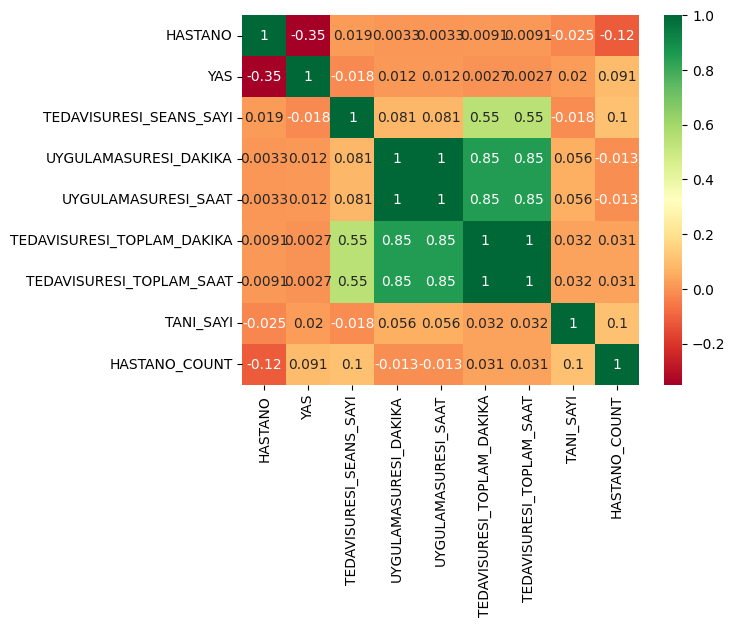

In [28]:

for col in num_cols:
    if col == "TEDAVISURESI_SEANS_SAYI":
        continue
    analyze_df.target_summary_with_num(df, "TEDAVISURESI_SEANS_SAYI", col)


for col in cat_cols:
    analyze_df.target_summary_with_cat(df, "TEDAVISURESI_SEANS_SAYI", col)

analyze_df.correlation_for_drop(df[num_cols], threshold=0.85)
sns.heatmap(df[num_cols].corr(method="spearman"), annot=True, cmap="RdYlGn")



In [29]:
df.columns

Index(['HASTANO', 'YAS', 'CINSIYET', 'KANGRUBU', 'UYRUK', 'KRONIKHASTALIK',
       'BOLUM', 'ALERJI', 'TANILAR', 'TEDAVIADI', 'TEDAVISURESI_SEANS_SAYI',
       'UYGULAMAYERLERI', 'UYGULAMASURESI_DAKIKA', 'UYGULAMASURESI_SAAT',
       'TEDAVISURESI_TOPLAM_DAKIKA', 'TEDAVISURESI_TOPLAM_SAAT',
       'TANILAR_LIST', 'TANI_SAYI', 'ALERJI_SAYI', 'UYGULAMAYERLERI_SAYI',
       'KRONIKHASTALIK_SAYI', 'TEDAVIADI_SAYI', 'TANI_CATEGORY_LIST',
       'MULTI_MORBIDITY_FLAG', 'HAS_DIABETES', 'HAS_HYPERTENSION',
       'HAS_CARDIAC', 'HAS_RESPIRATORY', 'HAS_MUSCULAR_DYSTROPHY',
       'HAS_THYROID', 'RISK_SKORU', 'TEDAVI_KATEGORISI',
       'TEDAVI_SAYISI_UNIQUE', 'EN_SIK_TEDAVI', 'IS_PHYSIOTHERAPY',
       'IS_RESPIRATORY', 'IS_ELECTROTHERAPY', 'IS_MASSAGE', 'IS_ORTHOPEDIC',
       'IS_OTHER', 'YAS_LABELS', 'KANGRUBU_TYPE', 'KANGRUBU_POSITIVE',
       'REPETITIVE_DATA', 'HASTANO_COUNT'],
      dtype='object')

In [30]:
df.head()

,HASTANO,YAS,CINSIYET,KANGRUBU,UYRUK,KRONIKHASTALIK,BOLUM,ALERJI,TANILAR,TEDAVIADI,...,IS_RESPIRATORY,IS_ELECTROTHERAPY,IS_MASSAGE,IS_ORTHOPEDIC,IS_OTHER,YAS_LABELS,KANGRUBU_TYPE,KANGRUBU_POSITIVE,REPETITIVE_DATA,HASTANO_COUNT
0,145134,60,kadın,0 rh+,türkiye,"becker musküler distrofisi, hipotiroidizm, kal...","fiziksel tıp ve rehabilitasyon,solunum merkezi",toz,ayak bileği ve ayağın yüzeysel yaralanması,ayak bileği,...,0,0,0,0,1,YASLI,0,1,1,1
1,145135,28,erkek,0 rh+,türkiye,"duchenne musküler distrofisi, myastenia gravis...","fiziksel tıp ve rehabilitasyon,solunum merkezi",yok,"omuzun darbe sendromu,dorsalji̇, di̇ğer, servi...",dorsalji -boyun+trapez+skapular,...,0,0,0,0,0,GENC_YETISKIN,0,1,1,5
2,145135,28,erkek,0 rh+,türkiye,"duchenne musküler distrofisi, myastenia gravis...","fiziksel tıp ve rehabilitasyon,solunum merkezi",yok,"omuzun darbe sendromu,dorsalji̇, di̇ğer, servi...",dorsalji -boyun+trapez+skapular,...,0,0,0,0,0,GENC_YETISKIN,0,1,1,5
3,145135,28,erkek,0 rh+,türkiye,"duchenne musküler distrofisi, myastenia gravis...","fiziksel tıp ve rehabilitasyon,solunum merkezi",yok,"omuzun darbe sendromu,dorsalji̇, di̇ğer, servi...",dorsalji -boyun+trapez+skapular,...,0,0,0,0,0,GENC_YETISKIN,0,1,1,5
4,145135,28,erkek,0 rh+,türkiye,"duchenne musküler distrofisi, myastenia gravis...","fiziksel tıp ve rehabilitasyon,solunum merkezi",yok,"omuzun darbe sendromu,dorsalji̇, di̇ğer, servi...",dorsalji -boyun+trapez+skapular,...,0,0,0,0,0,GENC_YETISKIN,0,1,1,5
